In [2]:
#Import the necessary packages
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load The dataset
data = pd.read_csv('https://raw.githubusercontent.com/paathelb/data-science-projects/master/data/online_shoppers_intention.csv')

#Remove datasets with question marks
data = data[(data != '?').all(axis=1)]
data.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#Drop some variables
a = data.drop(['VisitorType', 'Weekend', 'Month', 'OperatingSystems', 'Browser','Region','TrafficType', 'SpecialDay', 'PageValues'], axis = 1)

#Define X and y
X= a.drop('Revenue', axis = 1)
y = data[['Revenue']]
X.info()
y.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 8 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
dtypes: float64(5), int64(3)
memory usage: 867.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12330 entries, 0 to 12329
Data columns (total 1 columns):
Revenue    12330 non-null bool
dtypes: bool(1)
memory usage: 108.4 KB


In [4]:
y.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [5]:
#Normalize feature variables
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551


In [6]:
#For target variable, replace True with 1 and False with 0
y[['Revenue']].replace({True: 1, False: 0})

,Revenue
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [7]:
# Split the dataset into training set and test set with a 0.8-0.2 ratio
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

Instructions for updating:
Colocations handled automatically by placer.


Using TensorFlow backend.


Instructions for updating:
Use tf.cast instead.
Best Accuracy on Validation Set = 0.8576642274856567


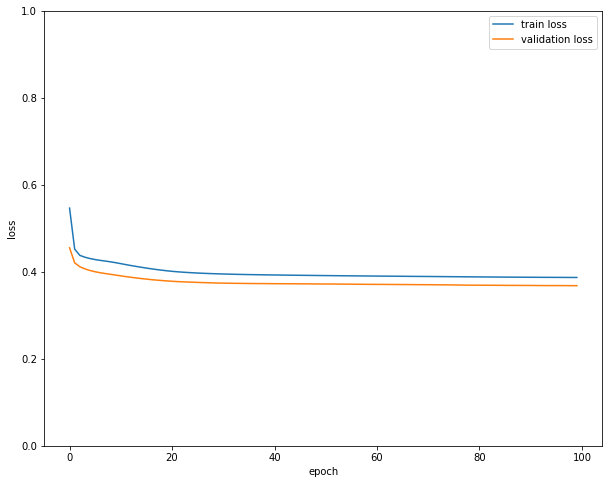

In [8]:
!pip install Keras

# define a seed for random number generator so the result will be reproducible
import numpy as np
import tensorflow as tf

np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model
from keras.models import Sequential
from keras.layers import Dense
model_1 = Sequential()
model_1.add(Dense(10, input_dim=X_test.shape[1], activation='relu'))
model_1.add(Dense(6, activation='relu'))
model_1.add(Dense(4, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluating on test set
history=model_1.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# import require packages for plotting
import matplotlib.pyplot as plt 
import matplotlib
%matplotlib inline 

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')

# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8580697774887085


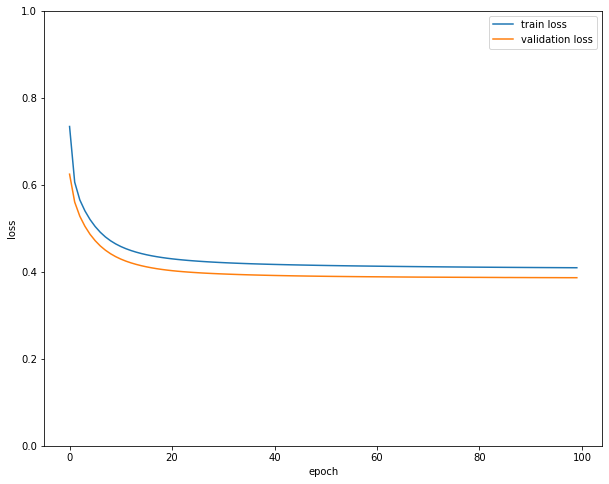

In [9]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l2 regularization with lambda = 0.01
from keras.regularizers import l2
l2_param = 0.01
model_2 = Sequential()
model_2.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_2.add(Dense(1, activation='sigmoid'))
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_2.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8576642274856567


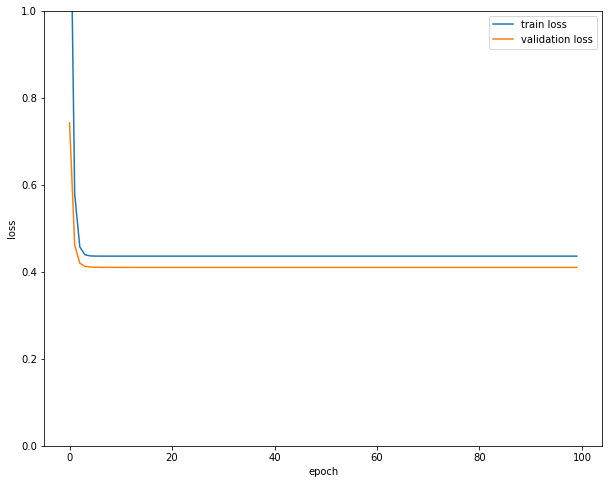

In [10]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l2 regularization with lambda = 0.1
from keras.regularizers import l2
l2_param = 0.1
model_3 = Sequential()
model_3.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_3.add(Dense(1, activation='sigmoid'))
model_3.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_3.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8580697774887085


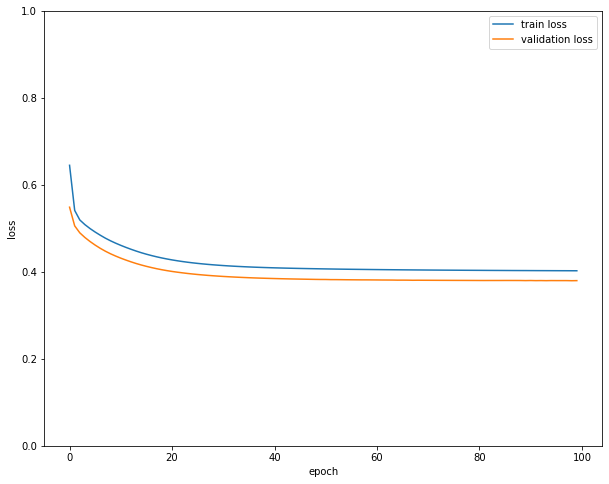

In [11]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l2 regularization with lambda = 0.05
from keras.regularizers import l2
l2_param = 0.005
model_4 = Sequential()
model_4.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(6, activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(4, activation='relu', kernel_regularizer=l2(l2_param)))
model_4.add(Dense(1, activation='sigmoid'))
model_4.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_4.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8576642274856567


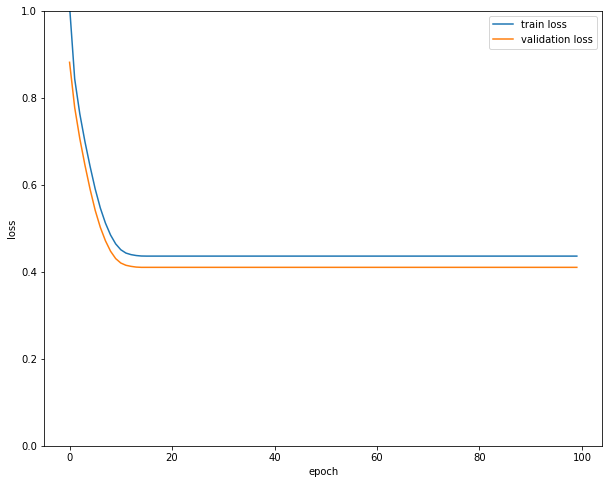

In [12]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l1 regularization with lambda = 0.01
from keras.regularizers import l1
l1_param = 0.01
model_5 = Sequential()
model_5.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(6, activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(4, activation='relu', kernel_regularizer=l1(l1_param)))
model_5.add(Dense(1, activation='sigmoid'))
model_5.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_5.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8576642274856567


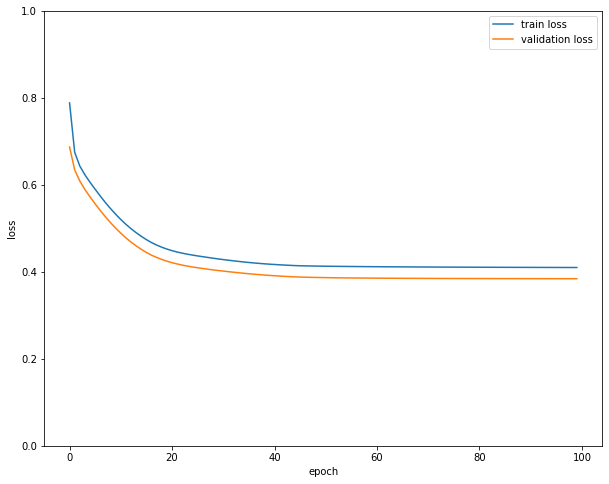

In [13]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l1 regularization with lambda = 0.005
from keras.regularizers import l1
l1_param = 0.005
model_6 = Sequential()
model_6.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(6, activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(4, activation='relu', kernel_regularizer=l1(l1_param)))
model_6.add(Dense(1, activation='sigmoid'))
model_6.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_6.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)

# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))

Best Accuracy on Validation Set = 0.8576642274856567


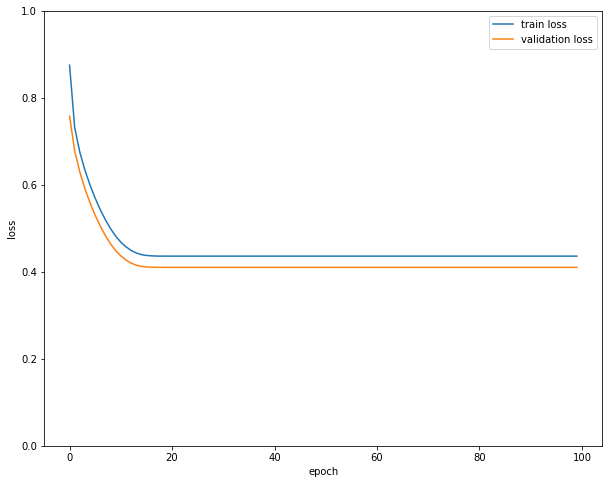

In [14]:
# set up a seed for random number generator so the result will be reproducible
np.random.seed(seed)
tf.set_random_seed(seed)

# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
from keras.regularizers import l1_l2
l1_param = 0.005
l2_param = 0.005
model_7 = Sequential()
model_7.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(6, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(4, activation='relu', kernel_regularizer=l1_l2(l1=l1_param, l2=l2_param)))
model_7.add(Dense(1, activation='sigmoid'))
model_7.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# train the model using training set while evaluationg on test set
history=model_7.fit(X_train, y_train, batch_size = 20, epochs = 100, validation_data=(X_test, y_test), verbose=0, shuffle=False)
 
# plot training error and test error
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,1)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
# print the best accuracy reached on the test set
print("Best Accuracy on Validation Set =", max(history.history['val_accuracy']))